# Segmenting Retinal Blood Vessels With Deep Neural Networks


In [83]:
import skimage as ski
from skimage import io, exposure, data
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from PIL import Image

In [84]:
filename = 'Data/01_dr.jpg'
mask_filename = 'Data/01_dr_mask.tif'

## Import images

#### Import jpg file

In [85]:
# import images
def loadImage(filename):
    image = ski.io.imread(filename)
    image = image.astype(np.float64)
    # if len(image.shape) == 3:
    #     image = ski.color.rgb2gray(image)
    image /= np.max(image)
    return image

# def saveImage(image, filename):
#     data = (image * 255).astype(np.uint8)
#     ski.io.imsave(filename, data)

def showImage(image):
    plt.imshow(image, cmap='gray')
    plt.show()

#### Import tif file

In [86]:
def loadImageTif(mask_filename):
	im = Image.open(mask_filename)
	imarray = np.array(im)
	return imarray

# Find edges on an image

In [87]:
def findEdges(image):
	thresh = 0.2
	image = scipy.ndimage.gaussian_filter(image, sigma=3)
	image = ski.filters.sobel(image) ** 0.5
	binary = (image > thresh) * 255
	binary = np.uint8(binary)
	return binary

# Modifiers

In [121]:
def sharpen(image):
	image = ski.filters.unsharp_mask(image, radius=40, amount=2) #20-40 radius, 1-2 amount
	return image

def brightness(image):
	image = ski.exposure.adjust_gamma(image, 0.1)
	return image

def contrast(image):
	image = ski.exposure.rescale_intensity(image, in_range=(0.1, 0.9))
	# image = ski.exposure.equalize_hist(image)
	return image

def extract_green_channel(image):
	green_channel = image[:, :, 1]
	return green_channel

def green_image(image):
	green_channel = image[:,:,1]
	green_img = np.zeros(image.shape)
	green_img[:,:,1] = green_channel
	return green_img

# Filtr Frangi'ego

In [115]:
# filtr frangi
def frangi(image):
	image = ski.filters.frangi(image, black_ridges=True)
	return image

Original image


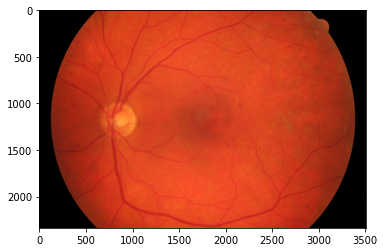

Extract green channel


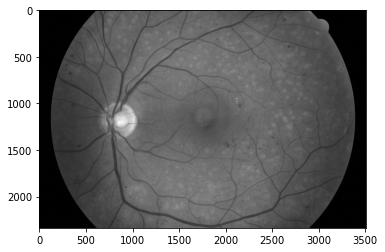

mask


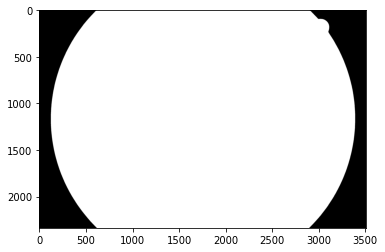

image with mask


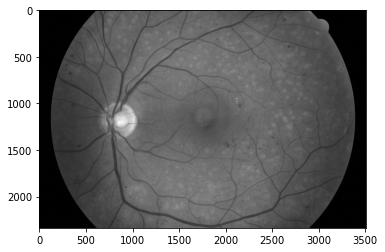

Frangi`s filter


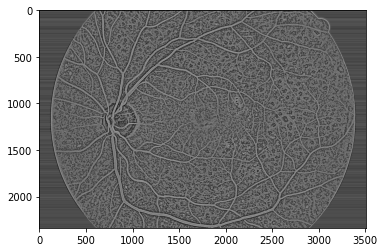

In [127]:
image = loadImage(filename)
mask = loadImageTif(mask_filename)

print("Original image")
showImage(image)

sharpen_img = True
bright_img = True
contrast_img = True

# print("Edited image")
# if sharpen_img:
# 	image = sharpen(image)
# if bright_img:
# 	image = brightness(image)
# if contrast_img:
# 	image = contrast(image)
# showImage(image)

print("Extract green channel")
image = extract_green_channel(image)
showImage(image)

print("mask")
mask = mask[:, :, 0]
showImage(mask)

print("image with mask")
img = image * mask
showImage(image)

print("Frangi`s filter")
# for i in range(100,600,10):
# 	print(image[500][i])

for i in range(len(img)):
	average = np.average(img[i])
	for j in range(len(img[i])):
		if img[i][j] == 0:
			img[i][j] = average

image = frangi(img)
image = brightness(image)

showImage(image)




normal


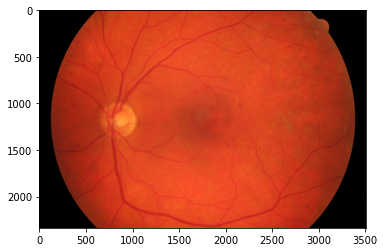

sharpen


C:\Users\Helena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skimage\filters\_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


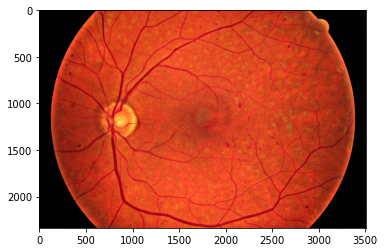

brightness


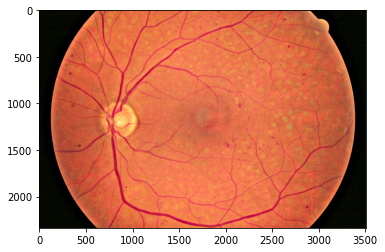

edges


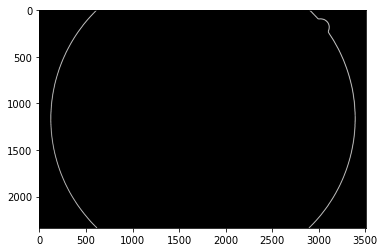

contrast image dark


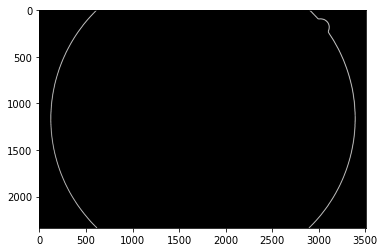

invert color


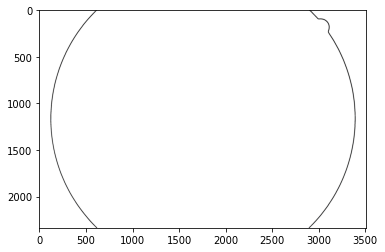

edges


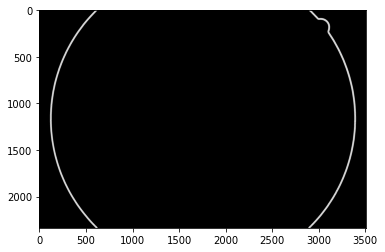

In [91]:
image = loadImage(filename)
image_minmax_scaled = exposure.rescale_intensity(image)
# print("max:", image_minmax_scaled.max())
# print("min:", image_minmax_scaled.min())


# interpolacja liniowa
def interpolate(image):
	min, max = image.min(), image.max()
	arr_subtracted = image - min  # Subtract the minimum
	# array([  0,  38,  98, 203, 248], dtype=uint8)
	arr_divided = arr_subtracted / (max - min)  # Divide by new max
	# array([0.        , 0.15322581, 0.39516129, 0.81854839, 1.        ])
	arr_multiplied = arr_divided * 255  # Multiply by dtype max
	# array([  0.        ,  39.07258065, 100.76612903, 208.72983871,
	#        255.        ])
	# Convert dtype to original uint8
	arr_rescaled = np.asarray(arr_multiplied, dtype=image.dtype)
	# array([  0,  39, 100, 208, 255], dtype=uint8)
	return arr_rescaled

def erase_above_average(image):
	average = image.mean(axis=0).mean(axis=0)
	print(average)
	for i in range(len(image)):
		for j in range(len(image[i])):
			if image[i][j] < average/2:
				image[i][j] = average
	return image



pipeline = [("sharpen", sharpen), ("brightness", brightness), ("edges", findEdges)]

print("normal")
showImage(image)

for title, fun in pipeline:
	print(title)
	image = fun(image)
	showImage(image)

# print("sharpen")
# image = sharpen(image)
# showImage(image)

# print("adjust gamma")
# image = brightness(image)
# showImage(image)

# print("erase_above_average")
# image = erase_above_average(image)
# showImage(image)

# print("Sobel_h")
# image = ski.filters.sobel_h(gamma_img)
# showImage(image)

print("contrast image dark")
image = ski.exposure.rescale_intensity(image, in_range=(0.1, 0.9))
showImage(image)

print("invert color")
image = ski.util.invert(image)
showImage(image)

print("edges")
image = findEdges(image)
showImage(image)


In [92]:
# import matplotlib.pyplot as plt
# img = loadImage(filename)
# avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

# indices = np.argsort(counts)[::-1]   
# freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
# rows = np.int_(img.shape[0]*freqs)

# dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
# for i in range(len(rows) - 1):
#     dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
# fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
# ax0.imshow(avg_patch)
# ax0.set_title('Average color')
# ax0.axis('off')
# ax1.imshow(dom_patch)
# ax1.set_title('Dominant colors')
# ax1.axis('off')
# plt.show(fig)

In [93]:
# import scipy


# def findEdges(images):
#     thresh = 0.2
#     list = []
#     for i in range(0, len(images)):
#         images [i] = scipy.ndimage.gaussian_filter(images[i], sigma=3)
#         images[i] = ski.filters.sobel(images[i]) ** 0.5
#         binary = (images[i] > thresh) * 255
#         binary = np.uint8(binary)
#         list.append(binary)
#     return list